In [1]:
from pybaseball import schedule_and_record ##Module available to scrape mutiple sources
##See here: https://github.com/jldbc/pybaseball

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [24]:
##Define empty dataframe to catch results from Baseball Reference
data = pd.DataFrame()

##Search for all years in Atlanta.
for year in range(1966, 2020) :
    
    ##Dump results in a temp variable.
    temp = schedule_and_record(year, 'ATL')

    ##Define the year for each game and add a column. Append to empty dataframe.
    temp['year'] = year
    data = data.append(temp, ignore_index = False) ##ignore_index = False would 
                                                  ##keep game of season correct for each year
    
##Tidy up a bit by placing year column next to date.
year = data['year']
data.drop(labels=['year'], axis = 1, inplace = True)
data.insert(1, 'year', year)

data.tail()

,Date,year,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
158,"Tuesday, Sep 24",2019,ATL,@,KCR,L,6.0,9.0,9.0,96-62,1.0,up 7.5,Duffy,Teheran,None,3:28,N,16688.0,-2,None
159,"Wednesday, Sep 25",2019,ATL,@,KCR,W,10.0,2.0,9.0,97-62,1.0,up 7.5,Jackson,Barnes,None,3:31,N,16931.0,1,None
160,"Friday, Sep 27",2019,ATL,@,NYM,L,2.0,4.0,9.0,97-63,1.0,up 6.0,Stroman,Keuchel,Lugo,3:09,N,26264.0,-1,None
161,"Saturday, Sep 28",2019,ATL,@,NYM,L,0.0,3.0,9.0,97-64,1.0,up 5.0,Matz,Foltynewicz,Diaz,2:33,N,32210.0,-2,None
162,"Sunday, Sep 29",2019,ATL,@,NYM,L-wo,6.0,7.0,11.0,97-65,1.0,up 4.0,Mazza,Dayton,None,3:44,D,31523.0,-3,None


In [25]:
##We are currently only interested in home games. Removing all away ('@') rows.
home = data['Home_Away']=='Home'
data_home = data[home]
data_home.columns

Index(['Date', 'year', 'Tm', 'Home_Away', 'Opp', 'W/L', 'R', 'RA', 'Inn',
       'W-L', 'Rank', 'GB', 'Win', 'Loss', 'Save', 'Time', 'D/N', 'Attendance',
       'Streak', 'Orig. Scheduled'],
      dtype='object')

In [26]:
##Extract Day of the week and Month_day from the Date column.
s = data_home['Date'].str.split(pat = ", ", expand = True)

##Add back as serpate columns
data_home.drop(labels = ['Date'], axis = 1, inplace = True)
data_home.insert(0, 'Day of Week', s[0])
data_home.insert(1, 'Month_day', s[1])

##Same thing to extract Month and day to place in their own columns. 
##Will eventually convert to Date object in the cleaned dataframe.
s2 = data_home['Month_day'].str.split(pat = ' ', expand = True, n = 1)

##Add back as serpate columns
data_home.drop(labels = ['Month_day'], axis = 1, inplace = True)
data_home.insert(1, 'Month', s2[0])
data_home.insert(2, 'Day of Month', s2[1])

##Determine running win percentage for each game. Separate W-L column.
s3 = data_home['W-L'].str.split(pat = '-', expand = True)

##Add back as separate W and L columns, plus calculate the win percentage: W/(W+L)
data_home.drop(labels = ['W-L'], axis = 1, inplace = True)
data_home.insert(11, 'Losses', s3[1])
data_home.insert(11, 'Wins', s3[0])

data_home.tail()

,Day of Week,Month,Day of Month,year,Tm,Home_Away,Opp,W/L,R,RA,...,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
153,Wednesday,Sep,18,2019,ATL,Home,PHI,L,1.0,4.0,...,1.0,up 9.0,Eflin,Teheran,Neris,2:59,N,27937.0,-3,None
154,Thursday,Sep,19,2019,ATL,Home,PHI,W,5.0,4.0,...,1.0,up 9.5,Soroka,Nola,Melancon,3:10,D,33223.0,1,None
155,Friday,Sep,20,2019,ATL,Home,SFG,W,6.0,0.0,...,1.0,up 9.5,Foltynewicz,Beede,None,2:21,N,37419.0,2,None
156,Saturday,Sep,21,2019,ATL,Home,SFG,W,8.0,1.0,...,1.0,up 9.5,Fried,Cueto,None,2:35,N,40899.0,3,None
157,Sunday,Sep,22,2019,ATL,Home,SFG,L,1.0,4.0,...,1.0,up 9.5,Webb,Keuchel,Smith,3:07,D,33674.0,-1,None


,Day of Week,Month,Day of Month,year,Tm,Home_Away,Opp,W/L,R,RA,...,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
0,Tuesday,Apr,12,1966,ATL,Home,PIT,L,2.0,3.0,...,8.0,1.0,Schwall,Cloninger,None,3:37,N,50671.0,-1,None
1,Wednesday,Apr,13,1966,ATL,Home,PIT,L,0.0,6.0,...,9.0,2.0,Law,Johnson,None,2:04,N,12721.0,-2,None
8,Friday,Apr,22,1966,ATL,Home,NYM,W,8.0,4.0,...,4.0,2.5,Cloninger,Hamilton,O'Dell,3:09,N,15665.0,4,None
9,Saturday,Apr,23,1966,ATL,Home,NYM,W,5.0,4.0,...,4.0,2.5,Fischer,Selma,Olivo,2:44,D,19539.0,5,None
10,Sunday,Apr,24 (1),1966,ATL,Home,NYM,W,5.0,2.0,...,3.0,2.0,Blasingame,Fisher,O'Dell,2:53,D,NaN,6,None
11,Sunday,Apr,24 (2),1966,ATL,Home,NYM,L,3.0,4.0,...,3.0,2.0,McGraw,Lemaster,Richardson,2:31,D,40477.0,-1,None


In [6]:
miss_att = pd.isna(data_home['Attendance'])

In [7]:
check_data = data_home.loc[miss_att]
#check_data['Attendance'] = data_home[miss_att]
check_data

,Day of Week,Month,Day of Month,year,Tm,Home_Away,Opp,W/L,R,RA,...,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
10,Sunday,Apr,24 (1),1966,ATL,Home,NYM,W,5.0,2.0,...,3.0,2.0,Blasingame,Fisher,O'Dell,2:53,D,NaN,6,None
26,Tuesday,May,10 (1),1966,ATL,Home,CIN,L,2.0,8.0,...,7.0,7.0,Maloney,Lemaster,Nottebart,2:25,N,NaN,-4,None
37,Sunday,May,22 (1),1966,ATL,Home,CHC,W,5.0,2.0,...,7.0,7.5,Blasingame,Ellsworth,Olivo,2:50,D,NaN,1,None
114,Saturday,Aug,13 (1),1966,ATL,Home,PHI,L,2.0,4.0,...,7.0,14.0,Bunning,Johnson,Knowles,2:40,N,NaN,-1,None
133,Friday,Sep,2 (1),1966,ATL,Home,HOU,W,6.0,5.0,...,7.0,13.5,Carroll,Taylor,Niekro,2:33,N,NaN,1,None
135,Saturday,Sep,3 (1),1966,ATL,Home,HOU,W,12.0,2.0,...,7.0,13.0,Vaughan,Giusti,Ritchie,2:45,N,NaN,3,None
177,Sunday,Apr,30 (1),1967,ATL,Home,PHI,L,4.0,6.0,...,3.0,4.0,Jackson,Carroll,Hall,2:26,D,NaN,-1,None
432,Saturday,Aug,3 (1),1968,ATL,Home,CIN,W,1.0,0.0,...,2.0,14.0,Reed,Culver,None,1:49,N,NaN,3,None
493,Sunday,Apr,13 (1),1969,ATL,Home,CIN,W,1.0,0.0,...,1.0,up 2.0,Niekro,Cloninger,None,2:20,D,NaN,1,None
538,Sunday,Jun,8 (1),1969,ATL,Home,PIT,W,11.0,10.0,...,1.0,up 2.0,Niekro,Hartenstein,None,2:57,D,NaN,1,None


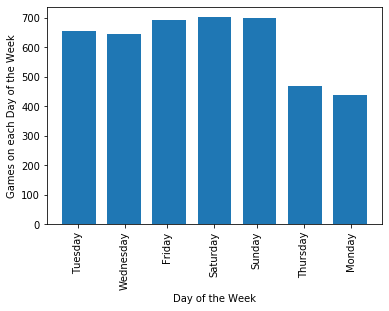

In [57]:
plt.hist(data_home['Day of Week'], 
         bins = 7,
         align = 'mid',
         rwidth = 0.75)

plt.xlabel('Day of the Week')
plt.xticks(rotation=90, 
           ticks = [0.4, 1.3, 2.1, 3.0, 3.8, 4.7, 5.6])

plt.ylabel('Games on each Day of the Week')

plt.show()
